### Acquisition

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('banco_imoveis.csv', dtype=str)

In [3]:
# drop useless column
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# rename columns
df.columns = ['rent', 'rooms', 'address', 'bathroom', 'parking', 'area', 'suburb', 'street']

In [4]:
df.head(10)

,rent,rooms,address,bathroom,parking,area,suburb,street
0,R$ 7.000 /Mês,2 Quartos,"Rua Volta Redonda, 757 - Campo Belo, São Paulo...",5 Banheiros,3 Vagas,276 m²,NaN,NaN
1,R$ 1.650 /Mês,2 Quartos,Rua Professor Demóstenes Batista Figueira Marq...,1 Banheiro,1 Vaga,60 m²,NaN,NaN
2,R$ 2.400 /Mês,1 Quarto,"Rua Cristiano Viana, 463 - Cerqueira César, Sã...",1 Banheiro,1 Vaga,45 m²,NaN,NaN
3,R$ 1.900 /Mês,2 Quartos,"Rua Afonso Pena, 560 - Bom Retiro, São Paulo - SP",1 Banheiro,1 Vaga,42 m²,NaN,NaN
4,R$ 1.900 /Mês,2 Quartos,"Rua Araquém, 19 - Vila Mascote, São Paulo - SP",3 Banheiros,1 Vaga,84 m²,NaN,NaN
5,R$ 1.900 /Mês,1 Quarto,"Rua Adolfo Gordo, 52 - Campos Elíseos, São Pau...",1 Banheiro,1 Vaga,37 m²,NaN,NaN
6,R$ 3.400 /Mês,2 Quartos,"Rua Caconde, 310 - Jardim Paulista, São Paulo ...",2 Banheiros,1 Vaga,130 m²,NaN,NaN
7,R$ 3.400 /Mês,2 Quartos,"Rua Oscar Caravelas, 280 - Sumarezinho, São Pa...",2 Banheiros,2 Vagas,88 m²,NaN,NaN
8,R$ 4.200 /Mês,2 Quartos,"Rua Helena, 52 - Vila Olímpia, São Paulo - SP",2 Banheiros,1 Vaga,60 m²,NaN,NaN
9,R$ 2.500 /Mês,1 Quarto,"Avenida Vereador José Diniz, 3100 - Santo Amar...",1 Banheiro,1 Vaga,35 m²,NaN,NaN


### Manipulation

In [5]:
# extract suburb from the address column
df.suburb = df.address.str.split('\s-\s').str[1].str.split(', ').str[0]

In [6]:
# extract the street from the address column
df.street = df.address.str.split('\s-\s').str[0]

In [7]:
df.head(10)

,rent,rooms,address,bathroom,parking,area,suburb,street
0,R$ 7.000 /Mês,2 Quartos,"Rua Volta Redonda, 757 - Campo Belo, São Paulo...",5 Banheiros,3 Vagas,276 m²,Campo Belo,"Rua Volta Redonda, 757"
1,R$ 1.650 /Mês,2 Quartos,Rua Professor Demóstenes Batista Figueira Marq...,1 Banheiro,1 Vaga,60 m²,Cambuci,Rua Professor Demóstenes Batista Figueira Marq...
2,R$ 2.400 /Mês,1 Quarto,"Rua Cristiano Viana, 463 - Cerqueira César, Sã...",1 Banheiro,1 Vaga,45 m²,Cerqueira César,"Rua Cristiano Viana, 463"
3,R$ 1.900 /Mês,2 Quartos,"Rua Afonso Pena, 560 - Bom Retiro, São Paulo - SP",1 Banheiro,1 Vaga,42 m²,Bom Retiro,"Rua Afonso Pena, 560"
4,R$ 1.900 /Mês,2 Quartos,"Rua Araquém, 19 - Vila Mascote, São Paulo - SP",3 Banheiros,1 Vaga,84 m²,Vila Mascote,"Rua Araquém, 19"
5,R$ 1.900 /Mês,1 Quarto,"Rua Adolfo Gordo, 52 - Campos Elíseos, São Pau...",1 Banheiro,1 Vaga,37 m²,Campos Elíseos,"Rua Adolfo Gordo, 52"
6,R$ 3.400 /Mês,2 Quartos,"Rua Caconde, 310 - Jardim Paulista, São Paulo ...",2 Banheiros,1 Vaga,130 m²,Jardim Paulista,"Rua Caconde, 310"
7,R$ 3.400 /Mês,2 Quartos,"Rua Oscar Caravelas, 280 - Sumarezinho, São Pa...",2 Banheiros,2 Vagas,88 m²,Sumarezinho,"Rua Oscar Caravelas, 280"
8,R$ 4.200 /Mês,2 Quartos,"Rua Helena, 52 - Vila Olímpia, São Paulo - SP",2 Banheiros,1 Vaga,60 m²,Vila Olímpia,"Rua Helena, 52"
9,R$ 2.500 /Mês,1 Quarto,"Avenida Vereador José Diniz, 3100 - Santo Amar...",1 Banheiro,1 Vaga,35 m²,Santo Amaro,"Avenida Vereador José Diniz, 3100"


In [8]:
# extract the digits from the area column
df.area = df.area.str.extract('(.*) m²')

In [9]:
# extract the rent value
df.rent = df.rent.str.extract('R\$ (\d+.\d+) /Mês')

In [10]:
df.rent = df.rent.str.replace('\.', '', regex=True)

In [11]:
# extract no of rooms
df.rooms = df.rooms.str.extract('(.*) Quarto')

In [12]:
# extract no of bathrooms
df.bathroom = df.bathroom.str.extract('(.*) Banheiro')

In [13]:
# extract no of parking spots
df.parking = df.parking.str.extract('(.*) Vaga')

In [14]:
df.head(5)

,rent,rooms,address,bathroom,parking,area,suburb,street
0,7000,2,"Rua Volta Redonda, 757 - Campo Belo, São Paulo...",5,3,276,Campo Belo,"Rua Volta Redonda, 757"
1,1650,2,Rua Professor Demóstenes Batista Figueira Marq...,1,1,60,Cambuci,Rua Professor Demóstenes Batista Figueira Marq...
2,2400,1,"Rua Cristiano Viana, 463 - Cerqueira César, Sã...",1,1,45,Cerqueira César,"Rua Cristiano Viana, 463"
3,1900,2,"Rua Afonso Pena, 560 - Bom Retiro, São Paulo - SP",1,1,42,Bom Retiro,"Rua Afonso Pena, 560"
4,1900,2,"Rua Araquém, 19 - Vila Mascote, São Paulo - SP",3,1,84,Vila Mascote,"Rua Araquém, 19"


### Cleaning

In [15]:
#total number of addresses
df.address.count()

1102

In [16]:
# check number of unique addresses
df.address.nunique()

974

In [17]:
# remove duplicate addresses
df.drop_duplicates(subset=['address', 'rent'], keep='first', inplace=True)

In [18]:
df.shape

(1098, 8)

### Saving 

In [19]:
df.to_csv('clean.csv')

### Casting values to numeric for EDA

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 0 to 1101
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rent      1098 non-null   object
 1   rooms     1098 non-null   object
 2   address   1098 non-null   object
 3   bathroom  1098 non-null   object
 4   parking   1098 non-null   object
 5   area      1098 non-null   object
 6   suburb    1098 non-null   object
 7   street    1098 non-null   object
dtypes: object(8)
memory usage: 77.2+ KB


In [21]:
# make an index only with the numeric columns
numeric = df.columns.drop(['address', 'suburb', 'street'])

In [22]:
numeric

Index(['rent', 'rooms', 'bathroom', 'parking', 'area'], dtype='object')

In [23]:
df[numeric] = df[numeric].apply(pd.to_numeric, errors='coerce')

In [24]:
df.head(3)

,rent,rooms,address,bathroom,parking,area,suburb,street
0,7000,2.0,"Rua Volta Redonda, 757 - Campo Belo, São Paulo...",5.0,3.0,276,Campo Belo,"Rua Volta Redonda, 757"
1,1650,2.0,Rua Professor Demóstenes Batista Figueira Marq...,1.0,1.0,60,Cambuci,Rua Professor Demóstenes Batista Figueira Marq...
2,2400,1.0,"Rua Cristiano Viana, 463 - Cerqueira César, Sã...",1.0,1.0,45,Cerqueira César,"Rua Cristiano Viana, 463"


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 0 to 1101
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rent      1098 non-null   int64  
 1   rooms     1068 non-null   float64
 2   address   1098 non-null   object 
 3   bathroom  1091 non-null   float64
 4   parking   891 non-null    float64
 5   area      1098 non-null   int64  
 6   suburb    1098 non-null   object 
 7   street    1098 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 77.2+ KB


In [26]:
df.describe()

,rent,rooms,bathroom,parking,area
count,1098.000000,1068.000000,1091.000000,891.000000,1098.000000
mean,7412.638434,2.441011,2.597617,2.815937,191.764117
std,11628.341855,1.336280,1.858369,3.373694,243.575785
min,500.000000,1.000000,1.000000,1.000000,0.000000
25%,1864.000000,1.000000,1.000000,1.000000,45.000000
50%,3275.000000,2.000000,2.000000,2.000000,94.500000
75%,8000.000000,3.000000,4.000000,4.000000,250.000000
max,110000.000000,11.000000,11.000000,40.000000,2000.000000


### Resolve Missing Values 

In [27]:
# Check for missing values / NaNs etc
df.isna().sum()

rent          0
rooms        30
address       0
bathroom      7
parking     207
area          0
suburb        0
street        0
dtype: int64

In [28]:
# Fill up missing values
df.fillna(0, inplace=True)

In [29]:
df.isna().sum()

rent        0
rooms       0
address     0
bathroom    0
parking     0
area        0
suburb      0
street      0
dtype: int64

### Plotting with Pandas

<AxesSubplot:>

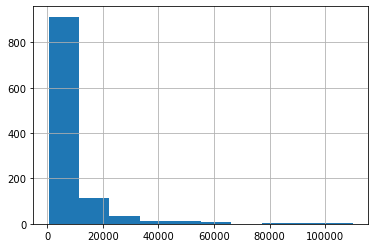

In [30]:
df.rent.hist()

<AxesSubplot:>

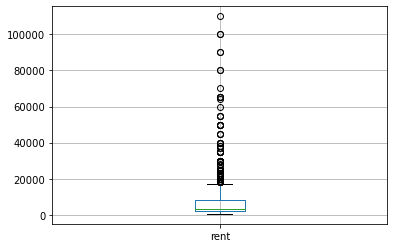

In [31]:
df.boxplot('rent')

### Plotting with Seaborn and Matplotlib

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Rent - (DistPlot and DisPlot)

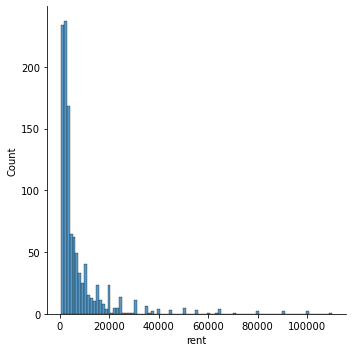

In [33]:
sns.displot(df.rent)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rent', ylabel='Density'>

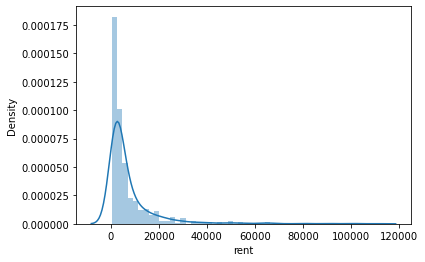

In [34]:
sns.distplot(df.rent)

#### Rent - Boxplot

<AxesSubplot:>

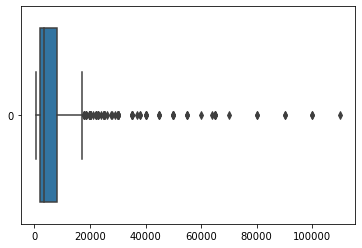

In [35]:
sns.boxplot(data= df.rent, orient='horizontal')

#### Rent by Area - ScatterPlot

Text(0, 0.5, 'Rent')

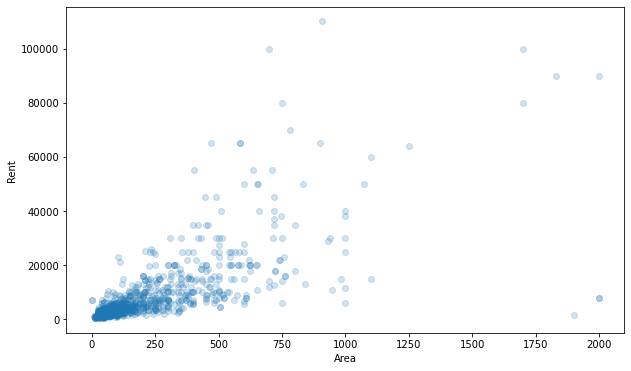

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(df.area, df.rent, alpha=0.2)
plt.xlabel('Area')
plt.ylabel('Rent')

#### Pairplot

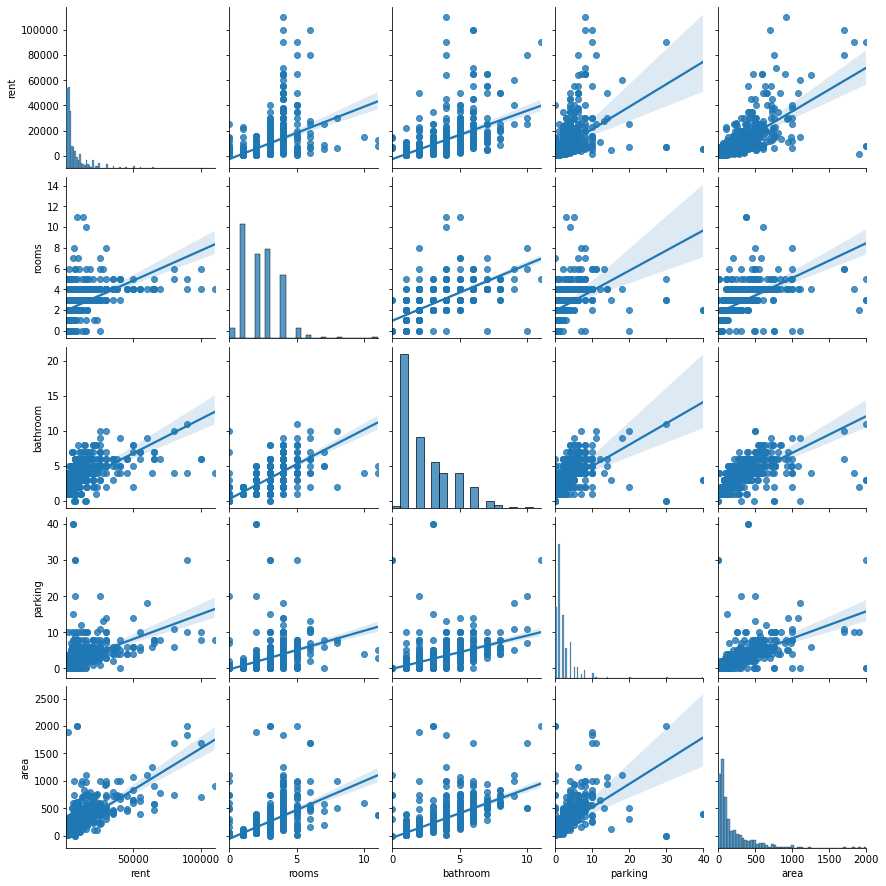

In [37]:
sns.pairplot(df, kind='reg')

#### Check Correlation

In [38]:
df.corr()

,rent,rooms,bathroom,parking,area
rent,1.000000,0.489941,0.613367,0.495619,0.724069
rooms,0.489941,1.000000,0.732924,0.455138,0.595079
bathroom,0.613367,0.732924,1.000000,0.529569,0.686052
parking,0.495619,0.455138,0.529569,1.000000,0.564135
area,0.724069,0.595079,0.686052,0.564135,1.000000


#### Heatmap

<AxesSubplot:>

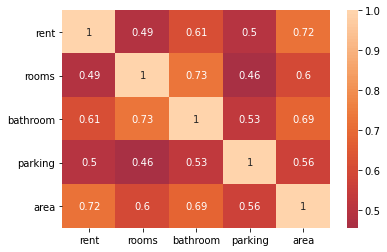

In [39]:
sns.heatmap(df.corr(), annot=True, center=0)

<AxesSubplot:>

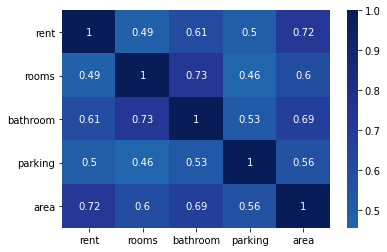

In [40]:
sns.heatmap(df.corr(), annot=True, center=0, cmap='YlGnBu')

#### Boxplot

<AxesSubplot:xlabel='suburb', ylabel='rent'>

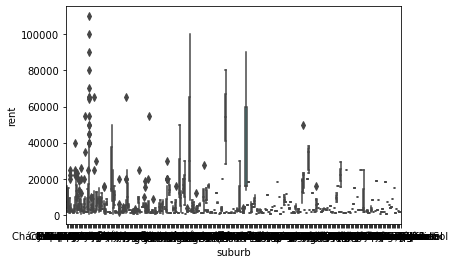

In [41]:
sns.boxplot(x='suburb', y='rent', data=df)

In [42]:
suburbs = {'Centre': ['Bela Vista','Bom Retiro','Cambuci','Consolação',
                      'Higienópolis','Liberdade','República','Santa Cecília','Sé','Paraíso','Santa Efigênia',
                      'Aclimação','Campos Eliseos','Campos Elíseos','Cerqueira César'],
          'North': ['Anhanguera','Brasilândia','Casa Verde','Cachoeirinha','Freguesia do Ó','Jaçanã','Jaraguá',
                   'Limão','Mandaqui','Perus','Pirituba','Santana','São Domingos','Tremembé','Tucuruvi','Vila Maria',
                   'Vila Medeiros','Vila Guilherme','Jardim Peri Peri'],
          'South': ['Campo Belo','Campo Limpo','Capão Redondo','Cidade Ademar','Cidade Dutra','Cursino','Grajaú',
                 'Itaim Bibi','Ipiranga','Jabaquara' ,'Jardim Ângela' ,'Jardim São Luís','Marsilac', 'Moema',
                 'Moema Pássaros','Moema Índios','Morumbi','Parelheiros','Pedreira','Sacomã' ,
                 'Santo Amaro','Socorro','Saúde','Vila Andrade','Vila Mariana','Vila Olímpia','Vila Mascote','Brooklin',
                 'Brooklin Novo','Brooklin Paulista','Cidade das Monções','Cidade Monções','Jardins','Vila Nova Conceição'],
          'East': ['Água Rasa','Aricanduva','Artur Alvim','Belém','Brás','Cangaíba','Carrão','Cidade Líder',
                   'Cidade Tiradentes','Ermelino Matarazzo','Guaianases','Itaim Paulista','Itaquera',
                   'Jardim Helena','José Bonifácio','Lajeado','Mooca','Pari','Parque do Carmo','Penha',
                   'Ponte Rasa','São Lucas','São Mateus','São Miguel','São Rafael','Sapopemba','Tatuapé',
                   'Vila Curuçá','Vila Formosa','Vila Jacuí','Vila Matilde','Vila Prudente','Mooca','Tatuapé','Carandiru','Mirandópolis'],
          'West': ['Alto de Pinheiros','Barra Funda','Butantã','Jaguará','Jardim Paulista','Jardim Paulistano',
                    'Jardim Europa','Jardim América','Lapa','Morumbi','Perdizes','Pinheiros','Raposo Tavares','Rio Pequeno'
                    'Vila Leopoldina','Vila Madalena','Vila Sônia','Sumarezinho','Sumaré','Boaçava','Jardim das Vertentes',
                    'Rio Pequeno','Vila Leopoldina','Panamby','Jardim Monte Kemel','Pompeia']}

In [43]:
def search_zone(suburb: str) -> str:
    for zone, sub_list in suburbs.items():
        if suburb in sub_list:
            return zone        
    
    return 'None'


In [44]:
search_zone('Bela Vista')

'Centre'

#### Map suburbs to its zones

In [45]:
df['zone'] = df.suburb.map(search_zone)

In [46]:
df.tail(10)

,rent,rooms,address,bathroom,parking,area,suburb,street,zone
1092,3000,3.0,"Rua João Elias Calache - Jardim Prudência, São...",4.0,2.0,125,Jardim Prudência,Rua João Elias Calache,None
1093,4000,2.0,"Parque São Domingos, São Paulo - SP",1.0,2.0,130,SP,"Parque São Domingos, São Paulo",None
1094,3500,3.0,"Rua Arcipreste Ezequias - Ipiranga, São Paulo ...",2.0,4.0,164,Ipiranga,Rua Arcipreste Ezequias,South
1095,3200,3.0,"Rua Chamantá - Vila Prudente, São Paulo - SP",4.0,2.0,200,Vila Prudente,Rua Chamantá,East
1096,3400,3.0,"Rua Henrique Botticini, 70 - Jardim Rizzo, São...",3.0,0.0,132,Jardim Rizzo,"Rua Henrique Botticini, 70",None
1097,1400,2.0,"Cidade Líder, São Paulo - SP",1.0,1.0,65,SP,"Cidade Líder, São Paulo",None
1098,9000,4.0,"Rua Áurea, 269 - Vila Mariana, São Paulo - SP",2.0,1.0,108,Vila Mariana,"Rua Áurea, 269",South
1099,1700,3.0,"Rua Aparecido Carlos Ferreira Correa, 270 - Vi...",4.0,2.0,160,Vila Tolstoi,"Rua Aparecido Carlos Ferreira Correa, 270",None
1100,3500,4.0,"Rua Guiratinga - Bosque da Saúde, São Paulo - SP",3.0,4.0,136,Bosque da Saúde,Rua Guiratinga,None
1101,3000,2.0,"Parque da Mooca, São Paulo - SP",2.0,3.0,242,SP,"Parque da Mooca, São Paulo",None


In [47]:
df.shape

(1098, 9)

#### Pairplot And Boxplot with hue for Zone

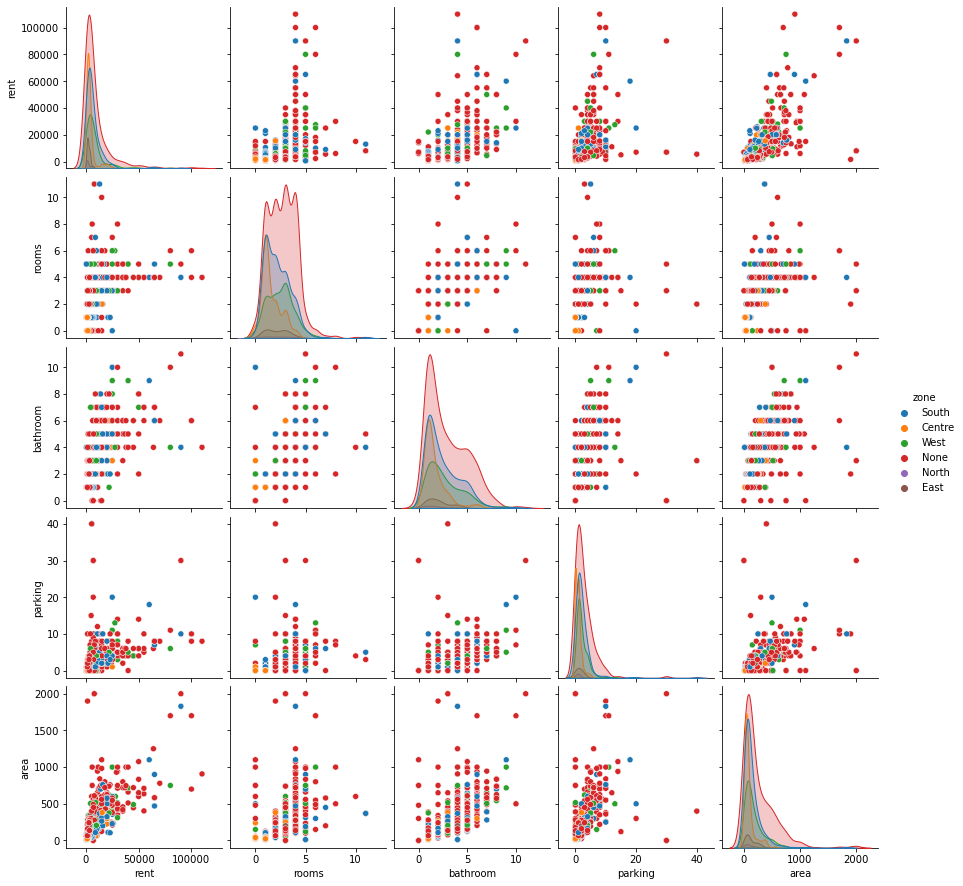

In [48]:
sns.pairplot(df, hue='zone')

<AxesSubplot:xlabel='zone', ylabel='rent'>

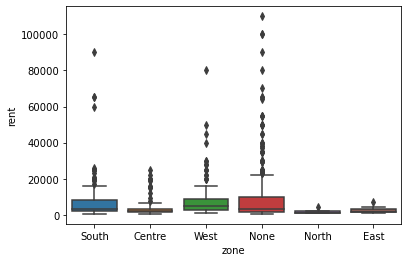

In [49]:
sns.boxplot(x='zone', y='rent', data=df)

#### Histogram Using Log

In [50]:
import math
rent = df.rent.apply(math.log)

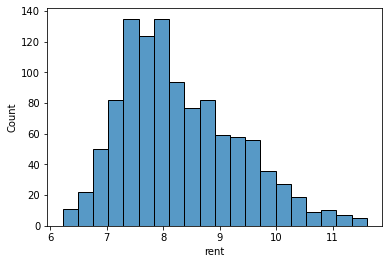

In [51]:
ax = sns.histplot(rent)